In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


In [4]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
linear_model = SVC(kernel='linear', C=1)
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [8]:
print("🔹 Linear Kernel SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

🔹 Linear Kernel SVM Accuracy: 0.956140350877193
[[41  2]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [9]:
rbf_model = SVC(kernel='rbf', C=1, gamma='scale')
rbf_model.fit(X_train, y_train)
y_pred_rbf = rbf_model.predict(X_test)

In [10]:

print("🔹 RBF Kernel SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


🔹 RBF Kernel SVM Accuracy: 0.9736842105263158
[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [11]:
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.1, 1]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.1, 1]})

In [12]:
print("✅ Best Parameters from GridSearch:", grid.best_params_)
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("🔹 Tuned RBF SVM Accuracy:", accuracy_score(y_test, y_pred_best))

✅ Best Parameters from GridSearch: {'C': 1, 'gamma': 'scale'}
🔹 Tuned RBF SVM Accuracy: 0.9736842105263158


In [13]:
scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("\n📈 Cross-Validation Accuracy (Tuned RBF):", np.round(scores.mean(), 4))



📈 Cross-Validation Accuracy (Tuned RBF): 0.9736


In [14]:
def plot_decision_boundary(model, X, y, title):
    from matplotlib.colors import ListedColormap
    X = X[:, :2]  # only 2 features for 2D plot
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

In [16]:
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, title):
    X = X[:, :2]  # Only the first 2 features for 2D plotting
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    model.fit(X, y)  # Train model on 2D data
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()


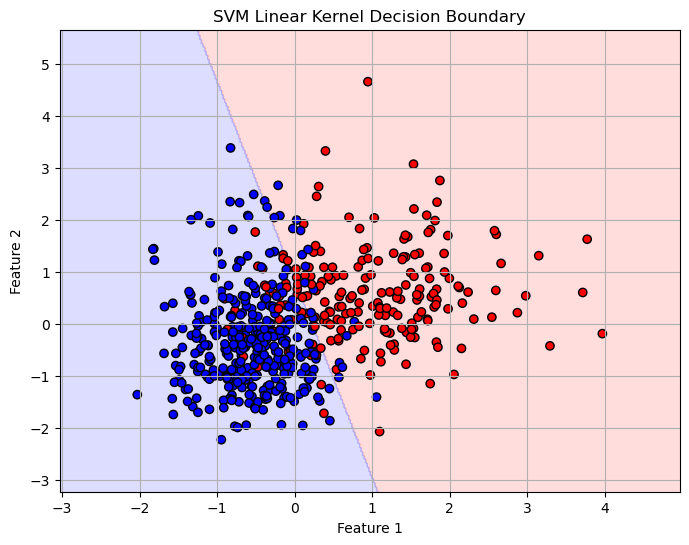

In [17]:
plot_decision_boundary(SVC(kernel='linear', C=1), X_scaled, y, "SVM Linear Kernel Decision Boundary")
